In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *
from utils import *
from data import *

In [3]:
# Print data columns
x.dtype.names

('classification',
 'distance_to_port',
 'distance_to_shore',
 'measure_course_diff',
 'measure_courseavg_10800',
 'measure_courseavg_1800',
 'measure_courseavg_21600',
 'measure_courseavg_3600',
 'measure_courseavg_43200',
 'measure_courseavg_86400',
 'measure_coursestddev_10800',
 'measure_coursestddev_1800',
 'measure_coursestddev_21600',
 'measure_coursestddev_3600',
 'measure_coursestddev_43200',
 'measure_coursestddev_86400',
 'measure_distance_to_port',
 'measure_heading_diff',
 'measure_new_score_10800',
 'measure_new_score_1800',
 'measure_new_score_21600',
 'measure_new_score_3600',
 'measure_new_score_43200',
 'measure_new_score_86400',
 'measure_pos_10800',
 'measure_pos_1800',
 'measure_pos_21600',
 'measure_pos_3600',
 'measure_pos_43200',
 'measure_pos_86400',
 'measure_speed',
 'measure_speed_diff',
 'measure_speedavg_10800',
 'measure_speedavg_1800',
 'measure_speedavg_21600',
 'measure_speedavg_3600',
 'measure_speedavg_43200',
 'measure_speedavg_86400',
 'measure_spe

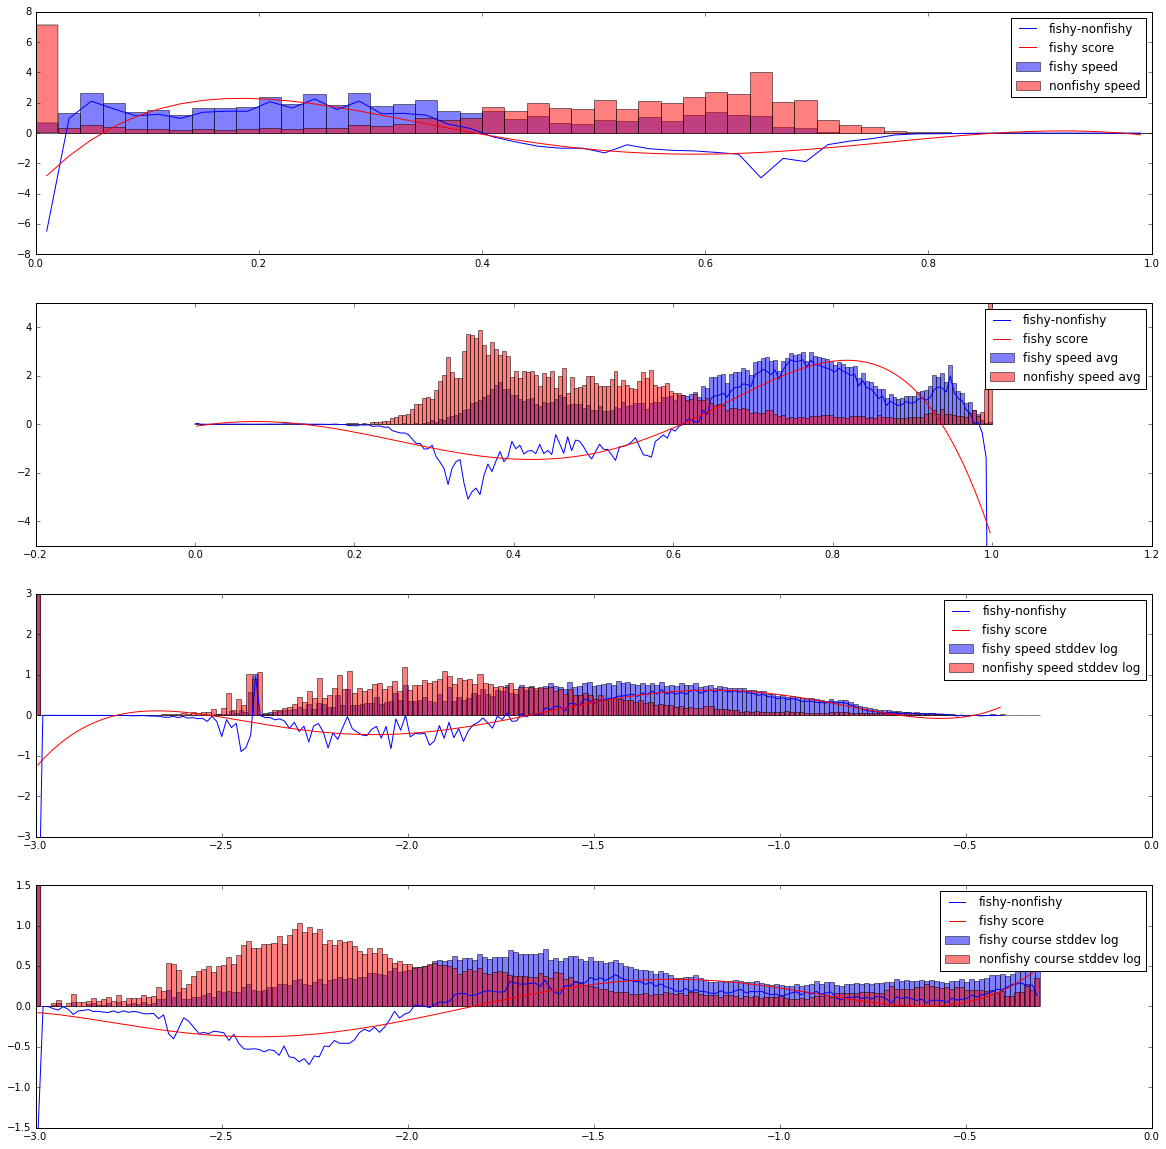

In [4]:
histfix = figure(figsize=(20,20))

histfix.add_subplot(411)

xfishy_hist = center_hist_bins(hist(clamp(xfishy["speed"]/17, 0, 1), bins=50, normed=True, color='b', alpha=0.5, label="fishy speed"))
xnonfishy_hist = center_hist_bins(hist(clamp(xnonfishy["speed"]/17, 0, 1), bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

speed_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *speed_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(412).set_ylim(-5, 5)

xfishy_hist = center_hist_bins(hist(xfishy["measure_speedavg_3600"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg"))
xnonfishy_hist = center_hist_bins(hist(xnonfishy["measure_speedavg_3600"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed avg"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedavg_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedavg_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(413).set_ylim(-3, 3)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_speedstddev_3600"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_speedstddev_3600"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_speedstddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_speedstddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()



histfix.add_subplot(414).set_ylim(-1.5, 1.5)

xfishy_hist = center_hist_bins(hist(log10(xfishy["measure_coursestddev_3600"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log"))
xnonfishy_hist = center_hist_bins(hist(log10(xnonfishy["measure_coursestddev_3600"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log"))

x_hist = (xfishy_hist[0] - xnonfishy_hist[0], xfishy_hist[1])

measure_coursestddev_args = curve_fit(polynomial, x_hist[1], x_hist[0], [1]*6)[0]

plot(x_hist[1], x_hist[0], color='b', label='fishy-nonfishy')
plot(x_hist[1], [polynomial(value, *measure_coursestddev_args) for value in x_hist[1]], color='r', label='fishy score')

legend()


show()



In [5]:
try:
    x = append_fields(x, 'score_speed', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedavg_3600', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedstddev_3600', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_coursestddev_3600', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score_speed'][:] = polynomial(clamp(x["speed"]/17, 0, 1), *speed_args)
x['score_speedavg_3600'][:] = polynomial(x["measure_speedavg_3600"], *measure_speedavg_args)
x['score_speedstddev_3600'][:] = polynomial(log10(x["measure_speedstddev_3600"]+0.001), *measure_speedstddev_args)
x['score_coursestddev_3600'][:] = polynomial(log10(x["measure_coursestddev_3600"]+0.001), *measure_coursestddev_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)

In [7]:
score_args = curve_fit(linear, (x['score_speed'], x['score_speedavg_3600'], x['score_speedstddev_3600'], x['score_coursestddev_3600']), x['classification'], [1]*4)[0]

try:
    x = append_fields(x, 'score_3600', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score_3600'][:] = linear((x['score_speed'], x['score_speedavg_3600'], x['score_speedstddev_3600'], x['score_coursestddev_3600']), *score_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)


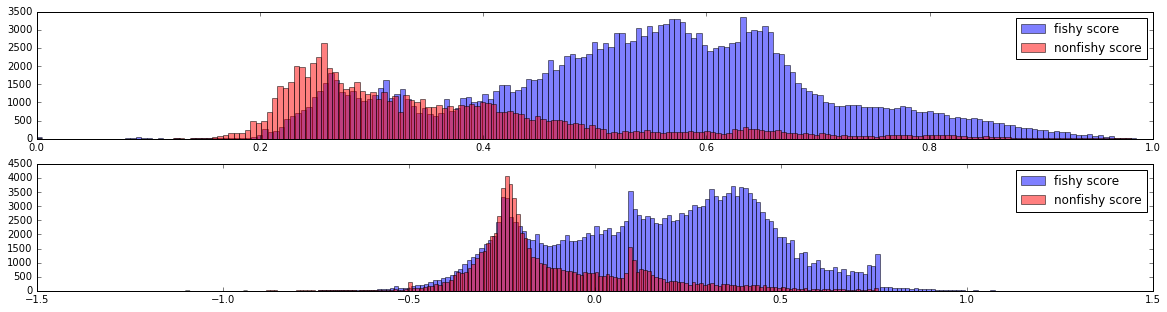

In [8]:
histfig = figure(figsize=(20,5))

subplot = histfig.add_subplot(211)
new_score_fishy = subplot.hist(xfishy["measure_new_score_3600"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
new_score_nonfishy = subplot.hist(xnonfishy["measure_new_score_3600"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
score_fishy = subplot.hist(xfishy["score_3600"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
score_nonfishy = subplot.hist(xnonfishy["score_3600"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()


show()

In [9]:
total = sum(new_score_fishy[0] + new_score_nonfishy[0])
non_overlap = sum(abs(new_score_fishy[0] - new_score_nonfishy[0]))
overlap = total - non_overlap
error = overlap / total

print "Error for measure_new_score: %s%%" % (error * 100)


total = sum(score_fishy[0] + score_nonfishy[0])
non_overlap = sum(abs(score_fishy[0] - score_nonfishy[0]))
overlap = total - non_overlap
error = overlap / total

print "Error for score: %s%%" % (error * 100)


Error for measure_new_score: 42.1728959889%
Error for score: 41.1035357102%


102